In [28]:
import pandas as pd
merged_df = pd.read_csv('Merged_DatasetV2.csv')
merged_df.head()


/tmp/ipykernel_1963/647249361.py:2: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Merged_DatasetV2.csv')


,Unnamed: 0,id,type,name,city,state,county,country,lifespan_years,status,services_offered
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,Columbia (CBS) Studio ‘B’,Test Restaurant,New York,NaN,US,NaN,Active,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,New Theatre Oxford,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,Santuario della Beata Vergine di Ariadello,Genivolta,NaN,NaN,IT,359.0,Active,NaN
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,ROKU-st,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,Rätschenmühle,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN


In [29]:
# Drop rows where 'services_offered' is null
merged_df = merged_df.dropna(subset=['services_offered'])

# Drop the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0', 'id', 'name','lifespan_years'])

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,Active,recorded at


In [30]:
# Split the 'services_offered' column by commas and explode the dataframe
merged_df['services_offered'] = merged_df['services_offered'].str.split(', ')
merged_df = merged_df.explode('services_offered')

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,Active,recorded at


In [31]:
merged_df['services_offered'].value_counts()

services_offered
recorded at              11660
mixed at                  3304
engineered at             1143
edited at                  279
produced at                265
premiere                   240
video shot at              104
arranged at_recording       53
composed at                 44
remixed at                  35
written at                  32
commissioned                29
lyrics written at            8
dedication                   5
arranged at_work             3
revised at                   2
Name: count, dtype: int64

In [32]:
# Impute missing values
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:
        merged_df[column].fillna(0, inplace=True)
    elif merged_df[column].dtype == 'object':
        merged_df[column].fillna('Missing', inplace=True)

# Display the updated dataframe
merged_df.head()

/tmp/ipykernel_1963/2411612687.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna('Missing', inplace=True)


,type,city,state,county,country,status,services_offered
15520,Other,Los Jarales,Missing,Missing,VE,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,Missing,US,Ended,engineered at
15525,Venue,Shimokitazawa Eki,Missing,Missing,JP,Active,recorded at


In [39]:
import prince

# Select the columns for MCA
mca_columns = ['type', 'status', 'services_offered']

# Perform MCA
mca = prince.MCA(n_components=27, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(merged_df[mca_columns])

# Transform the data
mca_transformed = mca.transform(merged_df[mca_columns])

# Display the transformed data
mca_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
15520,0.659767,0.441410,1.233396,-0.766231,-0.411001,-0.386277,-0.286422,0.353362,0.321102,-0.013842,...,0.107025,-0.240201,-0.356781,0.004104,-0.148400,0.183767,-0.225529,-0.342937,0.982337,-1.320126
15521,0.689759,-0.102731,-0.296865,0.027988,-0.089993,0.067846,0.018751,0.047214,-0.221693,-0.196650,...,0.419456,0.091561,-0.028335,0.151908,-0.145710,-0.048106,0.174452,-0.375663,-0.093283,0.174273
15522,0.659767,0.441410,1.233396,-0.766231,-0.411001,-0.386277,-0.286422,0.353362,0.321102,-0.013842,...,0.107025,-0.240201,-0.356781,0.004104,-0.148400,0.183767,-0.225529,-0.342937,0.982337,-1.320126
15524,-0.463379,-1.938450,0.109049,0.301915,0.135084,-0.057392,0.019026,0.976969,0.249232,-0.148341,...,-0.045073,-0.587706,0.352101,0.371497,0.975295,-0.100826,0.166950,0.344331,0.096204,-0.137428
15525,0.689759,-0.102731,-0.296865,0.027988,-0.089993,0.067846,0.018751,0.047214,-0.221693,-0.196650,...,0.419456,0.091561,-0.028335,0.151908,-0.145710,-0.048106,0.174452,-0.375663,-0.093283,0.174273


In [40]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.511,5.28%,5.28%
1,0.397,4.11%,9.39%
2,0.371,3.83%,13.22%
3,0.367,3.79%,17.01%
4,0.359,3.71%,20.72%
5,0.349,3.61%,24.33%
6,0.346,3.58%,27.91%
7,0.340,3.52%,31.42%
8,0.338,3.50%,34.92%


In [41]:
# Get the category contributions from MCA
# category_contributions = mca.column_coordinates(merged_df[mca_columns])
category_contributions = mca.column_contributions_

# Create a dataframe to store the top 10 feature contributions for each component
top_10_contributions_df = pd.DataFrame()

# Loop through each component and get the top 10 feature contributions
for i in range(27):
    top_10_contributions = category_contributions.iloc[:, i].abs().sort_values(ascending=False).head(10)
    top_10_contributions_df[f'Component_{i+1}'] = top_10_contributions.index

# Display the dataframe
top_10_contributions_df

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27
0,services_offered__mixed at,status__Ended,services_offered__video shot at,type__Educational institution,services_offered__premiere,services_offered__produced at,services_offered__remixed at,type__Club,type__Park,services_offered__written at,...,type__Concert hall / Theatre,services_offered__revised at,type__Park,services_offered__lyrics written at,services_offered__engineered at,services_offered__remixed at,services_offered__produced at,services_offered__premiere,type__Educational institution,services_offered__video shot at
1,type__Studio,type__Religious building,type__Other,services_offered__commissioned,type__Club,type__Missing,type__Amphitheatre,services_offered__engineered at,services_offered__lyrics written at,type__Park,...,type__Stadium,type__Festival stage,services_offered__written at,type__Festival stage,type__Indoor arena,type__Amphitheatre,type__Missing,type__Missing,services_offered__commissioned,type__Other
2,type__Venue,type__Missing,type__Religious building,type__Other,type__Concert hall / Theatre,type__Religious building,type__Religious building,type__Indoor arena,type__Festival stage,type__Festival stage,...,type__Festival stage,type__Pressing plant,services_offered__revised at,services_offered__produced at,type__Club,type__Religious building,type__Religious building,type__Concert hall / Theatre,type__Other,type__Educational institution
3,services_offered__recorded at,type__Club,type__Educational institution,services_offered__video shot at,type__Indoor arena,type__Festival stage,services_offered__produced at,services_offered__lyrics written at,services_offered__dedication,type__Concert hall / Theatre,...,type__Venue,services_offered__composed at,services_offered__video shot at,type__Pressing plant,services_offered__lyrics written at,services_offered__dedication,services_offered__premiere,services_offered__produced at,services_offered__video shot at,type__Religious building
4,services_offered__engineered at,services_offered__engineered at,services_offered__lyrics written at,type__Missing,type__Missing,type__Amphitheatre,services_offered__dedication,type__Concert hall / Theatre,services_offered__written at,type__Missing,...,services_offered__dedication,services_offered__engineered at,services_offered__edited at,type__Club,type__Concert hall / Theatre,type__Concert hall / Theatre,type__Concert hall / Theatre,type__Venue,services_offered__composed at,services_offered__revised at
5,services_offered__premiere,type__Venue,services_offered__revised at,services_offered__composed at,services_offered__produced at,services_offered__premiere,type__Other,services_offered__revised at,type__Religious building,services_offered__composed at,...,type__Indoor arena,type__Missing,type__Indoor arena,type__Concert hall / Theatre,services_offered__mixed at,services_offered__lyrics written at,type__Festival stage,type__Club,services_offered__written at,type__Venue
6,type__Other,type__Educational institution,services_offered__written at,services_offered__dedication,type__Other,services_offered__remixed at,type__Concert hall / Theatre,services_offered__mixed at,services_offered__produced at,services_offered__edited at,...,services_offered__revised at,services_offered__dedication,type__Concert hall / Theatre,services_offered__mixed at,type__Religious building,services_offered__premiere,type__Club,services_offered__engineered at,services_offered__dedication,services_offered__commissioned
7,type__Religious building,status__Active,type__Club,services_offered__revised at,type__Stadium,type__Concert hall / Theatre,services_offered__lyrics written at,services_offered__composed at,type__Stadium,services_offered__arranged at_recording,...,services_offered__edited at,type__Stadium,type__Other,s

In [42]:
category_contributions


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
type__Amphitheatre,0.001975,0.004237,0.000604,0.007726,1.829825e-03,0.069543,0.409769,1.143926e-05,0.000552,0.000415,...,1.289427e-04,0.000574,0.000001,0.001284,0.000123,0.438123,0.039069,0.009909,4.583293e-03,2.255777e-04
type__Club,0.012776,0.083156,0.026873,0.001969,1.944744e-01,0.012345,0.002954,1.885222e-01,0.004955,0.000002,...,1.513488e-05,0.019526,0.004071,0.055313,0.104938,0.006034,0.046319,0.038074,1.448547e-03,1.248397e-02
type__Concert hall / Theatre,0.013981,0.000494,0.000002,0.001384,1.409063e-01,0.036559,0.009049,9.521956e-02,0.002618,0.077361,...,1.660107e-01,0.000130,0.036716,0.050806,0.062649,0.009825,0.065322,0.109386,2.350826e-03,6.533786e-04
type__Educational institution,0.012902,0.047693,0.055874,0.344579,1.805061e-02,0.000005,0.001573,3.192350e-03,0.000038,0.002258,...,2.321851e-03,0.000965,0.000196,0.000748,0.004674,0.000886,0.000417,0.000005,3.159289e-01,1.223917e-01
type__Festival stage,0.000421,0.000585,0.002565,0.002412,1.645721e-02,0.070179,0.002754,2.898081e-03,0.120010,0.148773,...,1.037811e-01,0.176553,0.000079,0.170246,0.002752,0.000003,0.051762,0.024821,2.926359e-05,1.371624e-03
type__Indoor arena,0.011123,0.012866,0.008037,0.004829,4.544838e-02,0.005097,0.000002,1.240648e-01,0.007235,0.003995,...,9.240067e-02,0.001576,0.038603,0.039585,0.170846,0.002109,0.000030,0.022018,5.702561e-05,1.177343e-02
type__Missing,0.000128,0.098682,0.000046,0.031373,4.189230e-02,0.155649,0.007008,1.387336e-02,0.001213,0.072880,...,5.544912e-03,0.043358,0.002732,0.023555,0.027699,0.001893,0.158422,0.177835,8.223312e-03,4.887635e-03
type__Other,0.030622,0.010834,0.266696,0.075276,3.182856e-02,0.016445,0.010143,1.997010e-02,0.017707,0.000053,...,9.522121e-04,0.008813,0.018270,0.000054,0.002929,0.005969,0.011477,0.008730,1.486109e-01,2.275001e-01
type__Park,0.001768,0.008529,0.001191,0.012384,1.070830e-02,0.000801,0.002732,2.629596e-03,0.169462,0.162107,...,7.833228e-04,0.002601,0.379882,0.012344,0.017658,0.002699,0.001675,0.024125,6.867579e-03,2.348909e-03
type__Pressing plant,0.000004,0.003355,0.000069,0.000104,6.180075e-04,0.000072,0.000020,1.969267e-02,0.009107,0.016210,...,1.688820e-02,0.145914,0.002492,0.057552,0.025998,0.000048,0.000255,0.000042,4.760101e-04,1.040117e-06


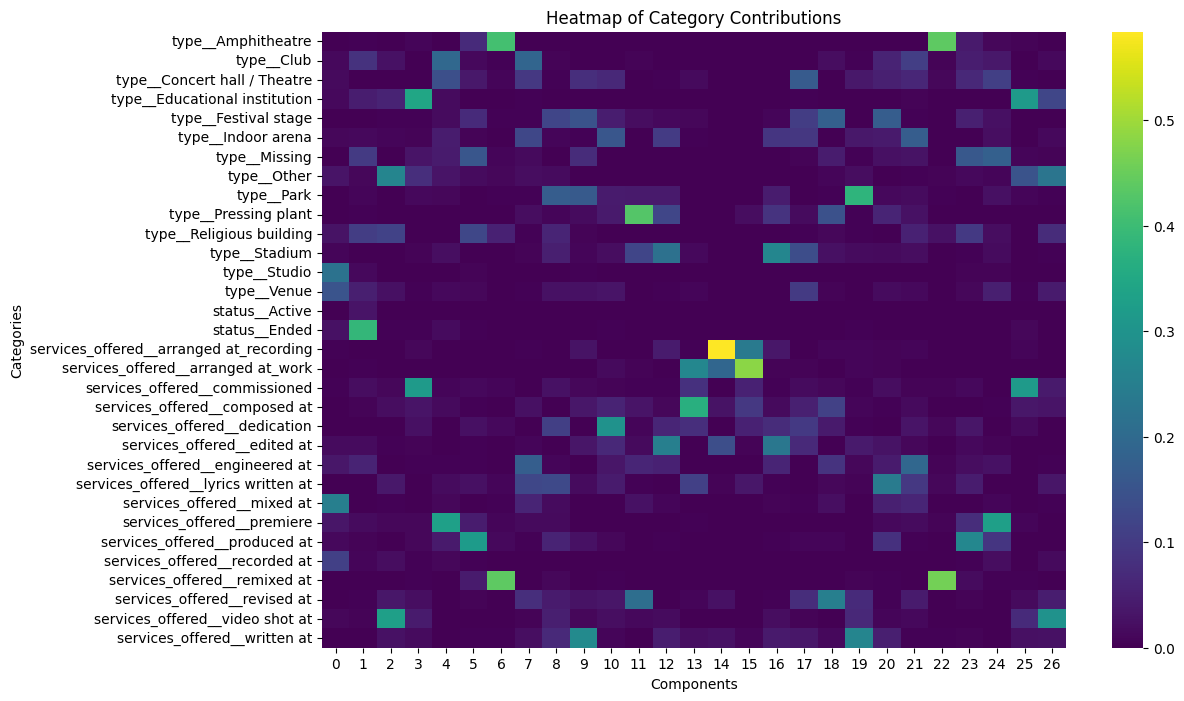

In [43]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a heatmap of category contributions
plt.figure(figsize=(12, 8))
sns.heatmap(category_contributions, cmap='viridis', annot=False)
plt.title('Heatmap of Category Contributions')
plt.xlabel('Components')
plt.ylabel('Categories')
plt.show()

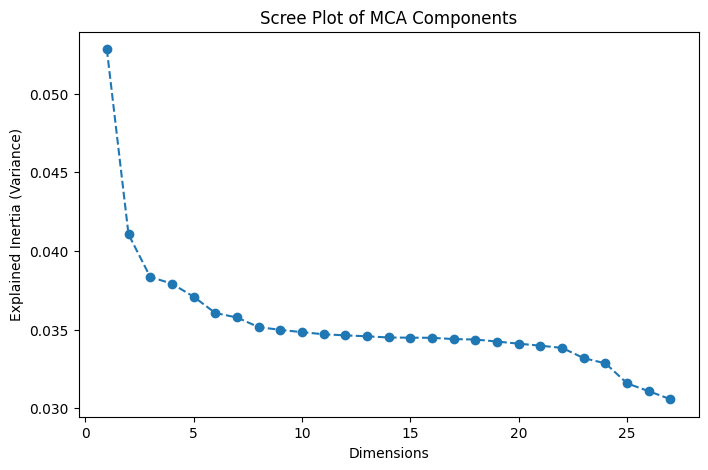

In [44]:
eigenvalues = mca.eigenvalues_
total_inertia = mca.total_inertia_
explained_inertia = eigenvalues / total_inertia

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_inertia)+1), explained_inertia, marker='o', linestyle='--')
plt.xlabel('Dimensions')
plt.ylabel('Explained Inertia (Variance)')
plt.title('Scree Plot of MCA Components')
plt.show()

<Axes: >

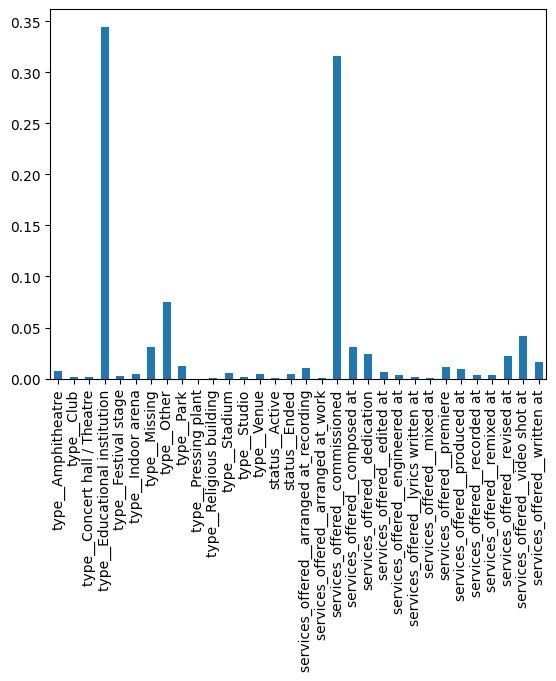

In [45]:
category_contributions[3].plot(kind='bar')

In [50]:
# Filtering dataset and rerunning MCA with top 5 relevant venue types (excluding "Other")

# Step 1: Find the top 5 most prevalent types (excluding "Other")
top_types = (
    merged_df['type']
    .value_counts()
    .drop('Other', errors='ignore')  # Exclude 'Other' if present
    .head(5)  # Select the top 5 most common types
    .index.tolist()
)

# Step 2: Add additional relevant types based on qualitative analysis
additional_types = ['Indoor Arena', 'Concert hall / Theatre', 'Stadium']  
selected_types = top_types + additional_types

# Step 3: Filter the dataset to include only the selected types
filtered_df = merged_df[merged_df['type'].isin(selected_types)].copy()

# Step 4: Apply MCA
mca_columns = ['type', 'status']
mca = prince.MCA(n_components=15, n_iter=3, random_state=42)
mca = mca.fit(filtered_df[mca_columns])

# Transform the filtered data
mca_transformed = mca.transform(filtered_df[mca_columns])

# Display results
print("Top 15 Feature Contributions for Each Component:")
category_contributions = mca.column_contributions_
top_15_contributions_df = pd.DataFrame()

num_components = category_contributions.shape[1]  # Get the actual number of components

top_15_contributions_df = pd.DataFrame()

for i in range(num_components):  # Iterate only over available components
    top_15_contributions = category_contributions.iloc[:, i].abs().sort_values(ascending=False).head(15)
    top_15_contributions_df[f'Component_{i+1}'] = top_15_contributions.index

top_15_contributions_df

Top 15 Feature Contributions for Each Component:


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8
0,status__Ended,type__Missing,type__Concert hall / Theatre,type__Religious building,type__Educational institution,type__Stadium,status__Ended,type__Studio
1,type__Venue,type__Studio,type__Stadium,type__Educational institution,type__Studio,type__Concert hall / Theatre,type__Venue,type__Venue
2,type__Religious building,type__Venue,type__Venue,type__Missing,type__Stadium,type__Religious building,type__Religious building,status__Active
3,type__Missing,type__Educational institution,type__Religious building,type__Stadium,type__Religious building,type__Venue,type__Missing,type__Missing
4,status__Active,type__Religious building,type__Educational institution,type__Studio,type__Venue,type__Educational institution,status__Active,type__Religious building
5,type__Studio,type__Stadium,type__Studio,type__Venue,type__Missing,type__Studio,type__Studio,type__Educational institution
6,type__Stadium,status__Ended,type__Missing,status__Ended,status__Ended,type__Missing,type__Stadium,type__Concert hall / Theatre
7,type__Educational institution,status__Active,status__Ended,status__Active,status__Active,status__Ended,type__Educational institution,status__Ended
8,type__Concert hall / Theatre,type__Concert hall / Theatre,status__Active,type__Concert hall / Theatre,type__Concert hall / Theatre,status__Active,type__Concert hall / Theatre,type__Stadium


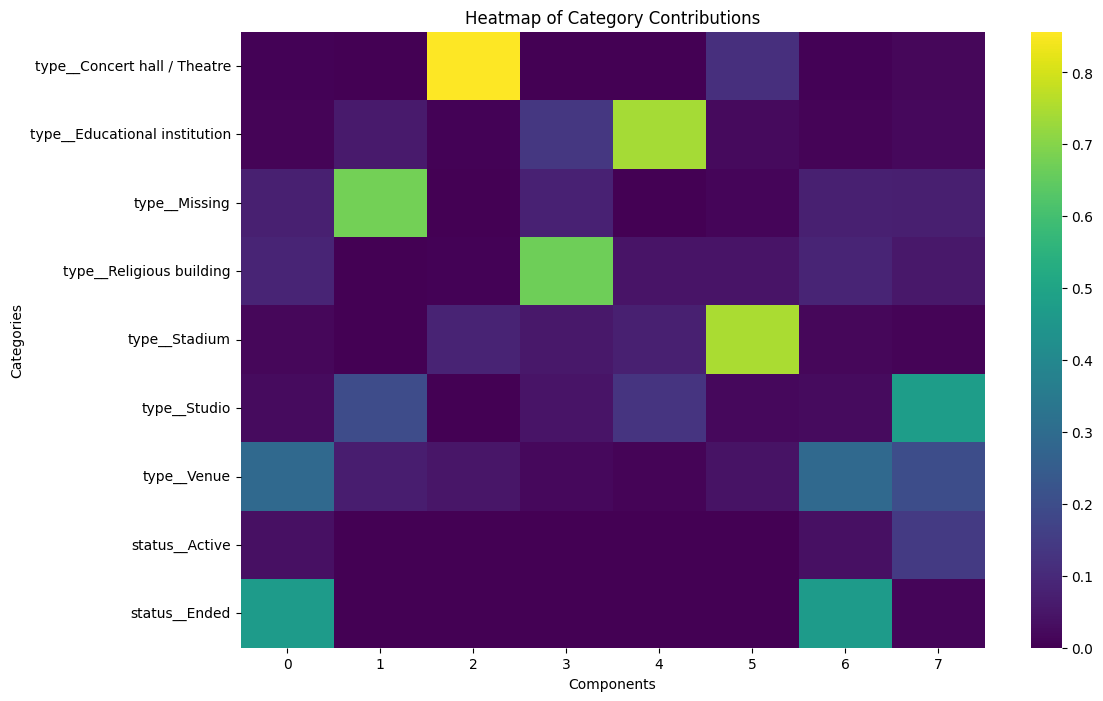

In [51]:
# Create a heatmap of category contributions
plt.figure(figsize=(12, 8))
sns.heatmap(category_contributions, cmap='viridis', annot=False)
plt.title('Heatmap of Category Contributions')
plt.xlabel('Components')
plt.ylabel('Categories')
plt.show()

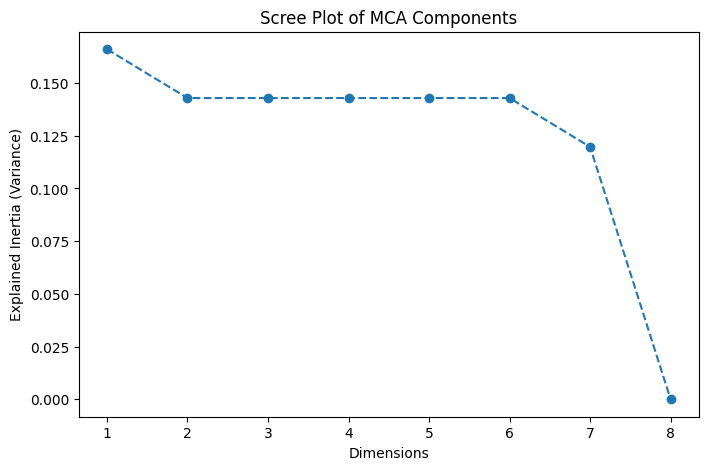

In [52]:
eigenvalues = mca.eigenvalues_
total_inertia = mca.total_inertia_
explained_inertia = eigenvalues / total_inertia

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_inertia)+1), explained_inertia, marker='o', linestyle='--')
plt.xlabel('Dimensions')
plt.ylabel('Explained Inertia (Variance)')
plt.title('Scree Plot of MCA Components')
plt.show()

In [53]:
# Sum the explained variance of the first 9 components
explained_variance_15d = explained_inertia[:15].sum()

# Convert to percentage
explained_variance_15d_pct = explained_variance_15d * 100

print(f"Explained variance using 15 dimensions: {explained_variance_15d_pct:.2f}%")

Explained variance using 15 dimensions: 100.00%


In [54]:
for d in [2, 3, 5, 8]:  # Adjust as needed
    var = explained_inertia[:d].sum() * 100
    print(f"Explained variance using {d} dimensions: {var:.2f}%")

Explained variance using 2 dimensions: 30.89%
Explained variance using 3 dimensions: 45.17%
Explained variance using 5 dimensions: 73.74%
Explained variance using 8 dimensions: 100.00%
